In [88]:
#### from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from IPython.core.display import clear_output
from time import time
import pandas as pd
import matplotlib.pyplot as plt 
start_time = time()
names =[]
num_reviews =[]
locations = []
pages = [str(i) for i in range(1,4)]
requests = 0
for page in pages:
    response = get('https://www.switchup.org/coding-bootcamps-reviews?mobile=false&page=' + page + '&subject=59',)
    sleep(randint(8,15))
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
    if requests > 72:
        warn('Number of requests was greater than expected.')
        break
    html_soup = BeautifulSoup(response.text, 'html.parser')
    bootcamp_info = html_soup.find_all('div', class_ = 'thumbnail-wrapper')
    #bootcamp_name = bootcamp_info.find('div', class_ = 'thumbnail-info')
    bootcamp_rating = html_soup.find_all('span' , itemprop = 'reviewcount')
    
    for br in bootcamp_info:    
        review = br.find_all('span', itemprop = 'reviewcount')
        if review is not None:
            for rating in review:
                num_reviews.append(rating.text.strip().strip('\n').replace("  ", "").replace('\n', " ").replace('reviews', "").replace('review','').replace('No','0'))
        #rating = bootcamp_rating.text
        #num_reviews.append(rating.strip().strip('\n').replace("  ", "").replace('\n', " "))
        #num_reviews.append(review)
        
                name = br.h4.a.text
                names.append(name)
        

print(len(names))
print(len(num_reviews))
#print(len(num_reviews))
names
num_reviews
test_df = pd.DataFrame({
    'BootCamp': names,
    'Reviews' : num_reviews,
})

print(names)

print(num_reviews)
test_df


43
43
['General Assembly', 'Thinkful', 'Product School', 'BrainStation', 'RMOTR', 'Tech Elevator', 'Ubiqum Code Academy', 'Xccelerate', 'Galvanize', 'Noble Desktop', 'Neoland', 'Coding Temple', 'Data Science Dojo', 'Codeworks', 'Dev League', 'V School', 'The Dev Masters', 'Byte Academy', 'CodingNomads', 'Level', 'Alchemy Code Lab', 'Green Fox Academy', 'SPICED Academy', 'Israel Tech Challenge ...', 'Codecademy', 'Science to Data ...', 'Promotable', 'VIVADATA', 'Make School', 'ASI Data Science', 'Skillspire', 'Nashville Software ...', 'UC Berkeley Data ...', 'EDIT Disruptive ...', 'UCF Coding Bootcamp', 'AllWomen', 'iKompass', 'PrwaTech', 'KeepCoding', 'XTOL Corp', 'Data Application Lab', 'CODEcamp Charleston', 'Code Union']
['645 ', '275 ', '195 ', '157 ', '149 ', '104 ', '103 ', '89 ', '85 ', '81 ', '74 ', '65 ', '58 ', '53 ', '48 ', '42 ', '32 ', '32 ', '28 ', '27 ', '22 ', '22 ', '22 ', '19 ', '17 ', '15 ', '12 ', '11 ', '11 ', '4 ', '3 ', '3 ', '2 ', '1 ', '1 ', '0 ', '0 ', '0 ', '

,BootCamp,Reviews
0,General Assembly,645
1,Thinkful,275
2,Product School,195
3,BrainStation,157
4,RMOTR,149
5,Tech Elevator,104
6,Ubiqum Code Academy,103
7,Xccelerate,89
8,Galvanize,85
9,Noble Desktop,81


In [89]:
test_df.plot(x='BootCamp',y='Reviews')

TypeError: Empty 'DataFrame': no numeric data to plot

In [90]:
test_df['Reviews'] = test_df['Reviews'].astype(float)

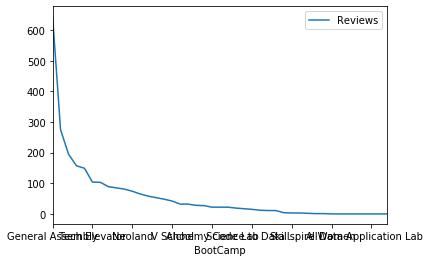

In [91]:
test_df.plot(x='BootCamp',y='Reviews')

TypeError: hist() got multiple values for argument 'x'

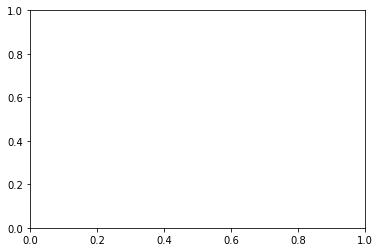

In [92]:
test_df.hist(x='BootCamp',y='Reviews')

In [93]:
test_df.hist(column='BootCamp')

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 432x288 with 0 Axes>

In [95]:
test_df.to_csv(bootcamp_ratings.csv)

NameError: name 'bootcamp_ratings' is not defined

In [96]:
test_df.to_csv('bootcamp_ratings.csv')